# Importing libraries 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Import the Dataset

In [5]:
data=pd.read_csv('Movie_Review.csv')
data

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
995,"""Campfire Tales"" is basically made up of three...",pos
996,I just saw this film at the phoenix film festi...,pos
997,It's out of question that the real Anna Anders...,pos
998,Michelle Pfeiffer stars as a mob widow who see...,pos


In [7]:
data.shape

(1000, 2)

In [8]:
data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [11]:
def clean_review(review):
    str=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [12]:
data['text']=data['text'].apply(clean_review)

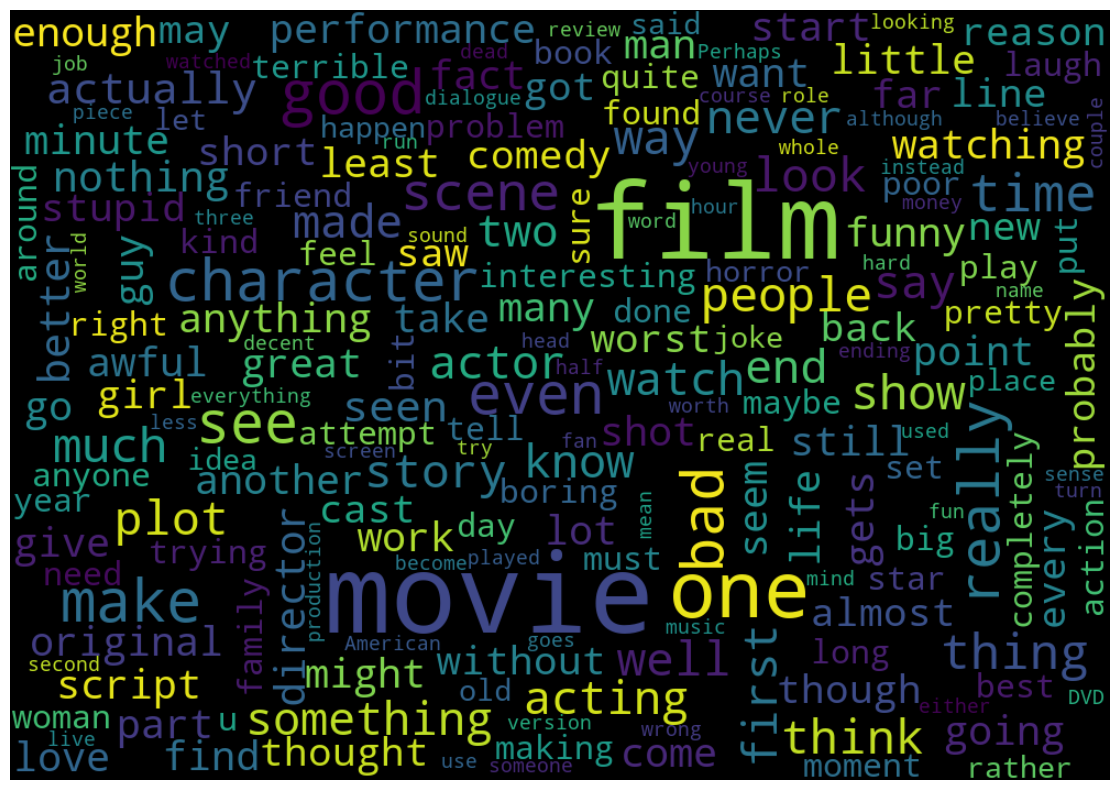

In [13]:
#wordcloud
from wordcloud import WordCloud
reviews=' '.join(word for word in data['text'][data['sentiment']=='neg'].astype(str))
wordcloud=WordCloud(height=700, width=1000, max_font_size=100)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

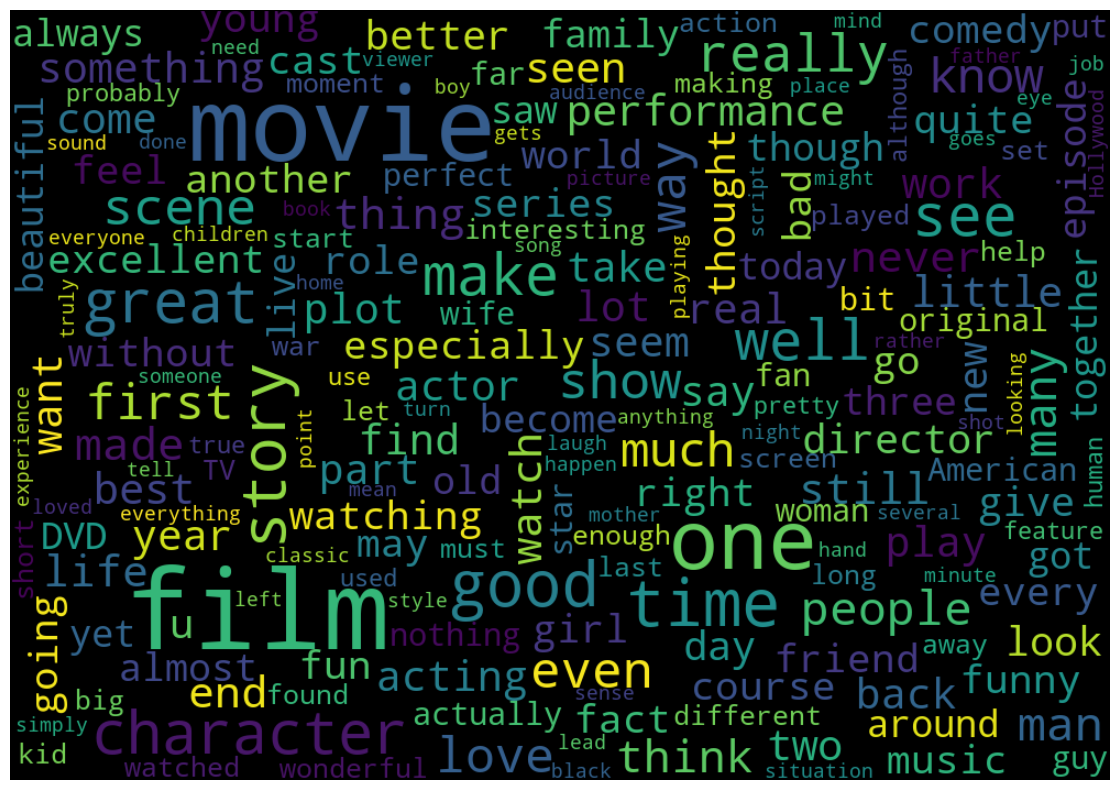

In [14]:
reviews=' '.join(word for word in data['text'][data['sentiment']=='pos'].astype(str))
wordcloud=WordCloud(height=700, width=1000, max_font_size=100)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#converting text to numeric values 
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [18]:
import warnings
warnings.filterwarnings('ignore')


reviews=cv.fit_transform(data['text']).toarray()
data['sentiment']=data['sentiment'].replace(['pos', 'neg'], [1,0])

In [19]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

# Modelling

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
model=LogisticRegression()
reviews_train, reviews_test, sentiment_train, sentiment_test= train_test_split(reviews, data['sentiment'], test_size= 0.2, random_state=42)
model.fit(reviews_train, sentiment_train)

LogisticRegression()

In [22]:
predict=model.predict(reviews_test)

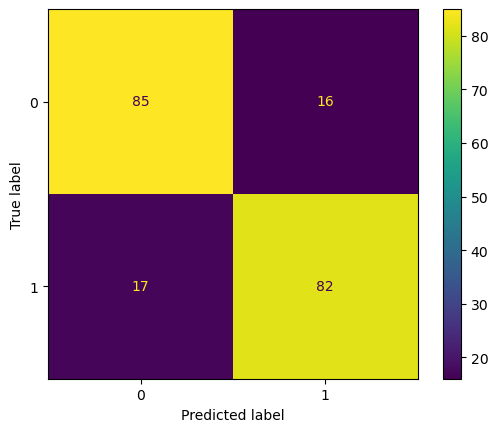

In [23]:
#plotting with confusionmatrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(sentiment_test, predict, labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()

In [24]:
import pickle as pkl
pkl.dump(model,open('model.pkl', 'wb'))
pkl.dump(cv,open('scaler.pkl', 'wb'))